#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

C:\Users\nien\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [20]:
model.add(Dropout(rate=0.25))

In [21]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [26]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [27]:
model.add(Dense(10, activation='softmax'))

In [28]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [29]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型 (loss='binary_crossentropy')

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 11s 299us/step - loss: 0.2094 - acc: 0.9182 - val_loss: 0.1984 - val_acc: 0.9205
Epoch 2/12
37500/37500 [==============================] - 11s 289us/step - loss: 0.1745 - acc: 0.9312 - val_loss: 0.1710 - val_acc: 0.9328
Epoch 3/12
37500/37500 [==============================] - 11s 301us/step - loss: 0.1537 - acc: 0.9396 - val_loss: 0.1589 - val_acc: 0.9381
Epoch 4/12
37500/37500 [==============================] - 11s 296us/step - loss: 0.1373 - acc: 0.9461 - val_loss: 0.1501 - val_acc: 0.9413
Epoch 5/12
37500/37500 [==============================] - 11s 297us/step - loss: 0.1231 - acc: 0.9515 - val_loss: 0.1436 - val_acc: 0.9440
Epoch 6/12
37500/37500 [==============================] - 11s 290us/step - loss: 0.1094 - acc: 0.9573 - val_loss: 0.1396 - val_acc: 0.9457
Epoch 7/12
37500/37500 [==============================] - 11s 288us/step - loss: 0.0969 - acc: 0.9623 - val_loss: 0.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

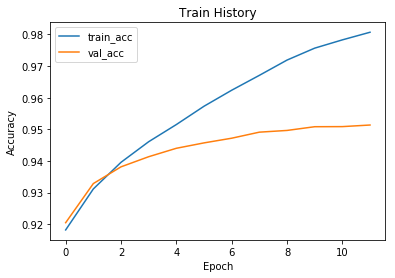

In [42]:
show_train_history('acc','val_acc')

# 訓練模型 (loss='MSE')

In [43]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

In [44]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 11s 294us/step - loss: 0.0135 - acc: 0.9073 - val_loss: 0.0368 - val_acc: 0.7354
Epoch 2/12
37500/37500 [==============================] - 11s 287us/step - loss: 0.0122 - acc: 0.9181 - val_loss: 0.0370 - val_acc: 0.7339
Epoch 3/12
37500/37500 [==============================] - 11s 290us/step - loss: 0.0112 - acc: 0.9258 - val_loss: 0.0364 - val_acc: 0.7397
Epoch 4/12
37500/37500 [==============================] - 11s 289us/step - loss: 0.0104 - acc: 0.9303 - val_loss: 0.0373 - val_acc: 0.7327
Epoch 5/12
37500/37500 [==============================] - 11s 288us/step - loss: 0.0096 - acc: 0.9373 - val_loss: 0.0372 - val_acc: 0.7349
Epoch 6/12
37500/37500 [==============================] - 11s 290us/step - loss: 0.0094 - acc: 0.9371 - val_loss: 0.0365 - val_acc: 0.7410
Epoch 7/12
37500/37500 [==============================] - 11s 282us/step - loss: 0.0091 - acc: 0.9392 - val_loss: 0.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

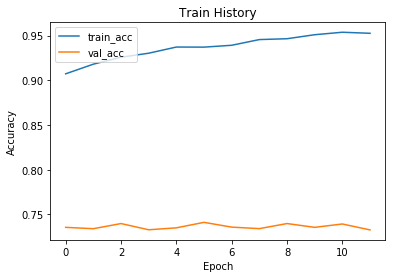

In [46]:
show_train_history('acc','val_acc')